<a href="https://colab.research.google.com/github/IshratJahan1623/Intro-to-Machine-Learning/blob/main/Homework_4/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1** (C=1E10, according to professor's code)


 Kernel: LINEAR
Training Accuracy: 1.000
Validation Accuracy: 0.930
Precision (benign class): 0.971
Recall (benign class): 0.917
F1 Score: 0.943

 Kernel: POLY
Training Accuracy: 1.000
Validation Accuracy: 0.956
Precision (benign class): 0.972
Recall (benign class): 0.958
F1 Score: 0.965

 Kernel: RBF
Training Accuracy: 1.000
Validation Accuracy: 0.947
Precision (benign class): 0.985
Recall (benign class): 0.931
F1 Score: 0.957

 Kernel: SIGMOID
Training Accuracy: 0.923
Validation Accuracy: 0.904
Precision (benign class): 0.955
Recall (benign class): 0.889
F1 Score: 0.921

 LOGISTIC REGRESSION (L1) 
Training Accuracy: 0.930
Validation Accuracy: 0.895
Precision (benign class): 0.984
Recall (benign class): 0.847
F1 Score: 0.910


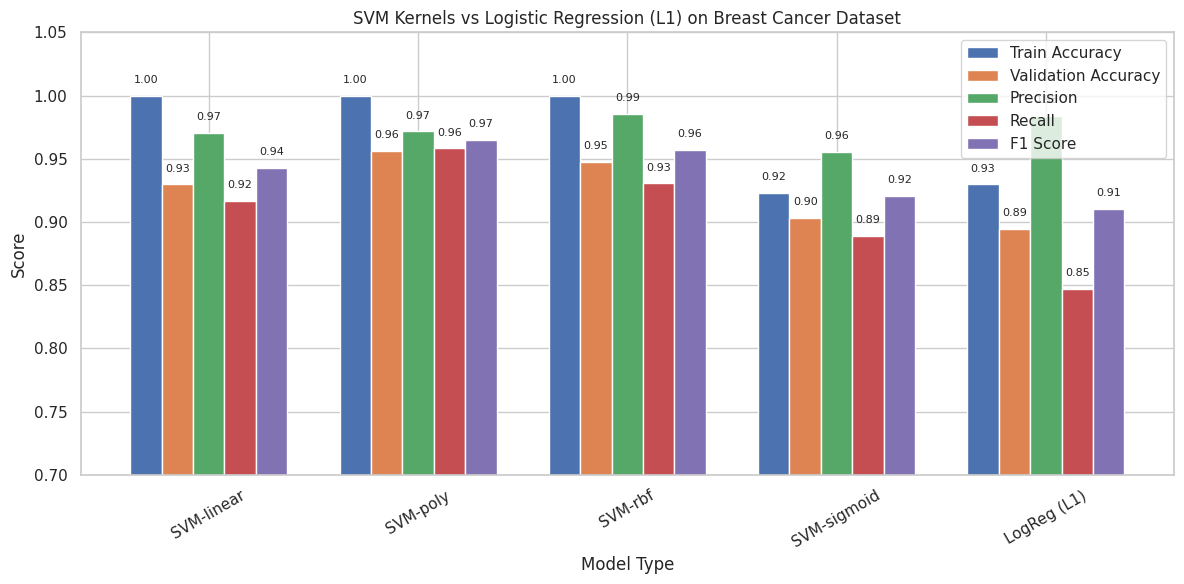

In [30]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

#
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#  Define SVM kernels to explore
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Store evaluation results
results = {
    'Model': [],
    'Train Accuracy': [],
    'Validation Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

#  Train and evaluate SVM for each kernel
for kernel in kernels:
    model = SVC(kernel=kernel, C=1E10, gamma='scale', random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test)
    rec = recall_score(y_test, y_pred_test)
    f1_val = f1_score(y_test, y_pred_test)

    # Store results
    results['Model'].append(f"SVM-{kernel}")
    results['Train Accuracy'].append(train_acc)
    results['Validation Accuracy'].append(val_acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1_val)

    # Console output
    print(f"\n Kernel: {kernel.upper()}")
    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Validation Accuracy: {val_acc:.3f}")
    print(f"Precision (benign class): {prec:.3f}")
    print(f"Recall (benign class): {rec:.3f}")
    print(f"F1 Score: {f1_val:.3f}")

#  Train and evaluate Logistic Regression (L1 penalty)
model_logreg = LogisticRegression(
    random_state=100,
    max_iter=1500,
    penalty='l1',
    C=0.01,
    solver='liblinear'
)
model_logreg.fit(X_train, y_train)

# Predictions
y_train_pred_lr = model_logreg.predict(X_train)
y_test_pred_lr = model_logreg.predict(X_test)

# Metrics
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
val_acc_lr = accuracy_score(y_test, y_test_pred_lr)
prec_lr = precision_score(y_test, y_test_pred_lr)
rec_lr = recall_score(y_test, y_test_pred_lr)
f1_lr = f1_score(y_test, y_test_pred_lr)

# Store logistic regression results
results['Model'].append('LogReg (L1)')
results['Train Accuracy'].append(train_acc_lr)
results['Validation Accuracy'].append(val_acc_lr)
results['Precision'].append(prec_lr)
results['Recall'].append(rec_lr)
results['F1 Score'].append(f1_lr)

# Console output for Logistic Regression
print(f"\n LOGISTIC REGRESSION (L1) ")
print(f"Training Accuracy: {train_acc_lr:.3f}")
print(f"Validation Accuracy: {val_acc_lr:.3f}")
print(f"Precision (benign class): {prec_lr:.3f}")
print(f"Recall (benign class): {rec_lr:.3f}")
print(f"F1 Score: {f1_lr:.3f}")

#  Convert results to NumPy arrays for plotting
models = results['Model']
train_accs = results['Train Accuracy']
val_accs = results['Validation Accuracy']
precisions = results['Precision']
recalls = results['Recall']
f1s = results['F1 Score']

#  PLOT RESULTS: Grouped Bar Chart
x = np.arange(len(models))
width = 0.15

plt.figure(figsize=(12,6))
plt.bar(x - 2*width, train_accs, width, label='Train Accuracy')
plt.bar(x - width, val_accs, width, label='Validation Accuracy')
plt.bar(x, precisions, width, label='Precision')
plt.bar(x + width, recalls, width, label='Recall')
plt.bar(x + 2*width, f1s, width, label='F1 Score')

plt.xticks(x, models, rotation=30)
plt.xlabel('Model Type')
plt.ylabel('Score')
plt.title('SVM Kernels vs Logistic Regression (L1) on Breast Cancer Dataset')
plt.ylim(0.7, 1.05)
plt.legend()

# Annotate each bar with its value
for i, metric_list in enumerate([train_accs, val_accs, precisions, recalls, f1s]):
    xpos = x + (i - 2) * width
    for xi, yi in zip(xpos, metric_list):
        plt.text(xi, yi + 0.01, f"{yi:.2f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

**Problem 1** (C=1)


 Kernel: LINEAR 
Training Accuracy: 0.991
Validation Accuracy: 0.974
Precision (benign class): 0.986
Recall (benign class): 0.972
F1 Score: 0.979

 Kernel: POLY 
Training Accuracy: 0.914
Validation Accuracy: 0.912
Precision (benign class): 0.878
Recall (benign class): 1.000
F1 Score: 0.935

 Kernel: RBF 
Training Accuracy: 0.982
Validation Accuracy: 0.982
Precision (benign class): 0.986
Recall (benign class): 0.986
F1 Score: 0.986

 Kernel: SIGMOID 
Training Accuracy: 0.954
Validation Accuracy: 0.921
Precision (benign class): 0.957
Recall (benign class): 0.917
F1 Score: 0.936

 LOGISTIC REGRESSION (L1)
Training Accuracy: 0.930
Validation Accuracy: 0.895
Precision (benign class): 0.984
Recall (benign class): 0.847
F1 Score: 0.910


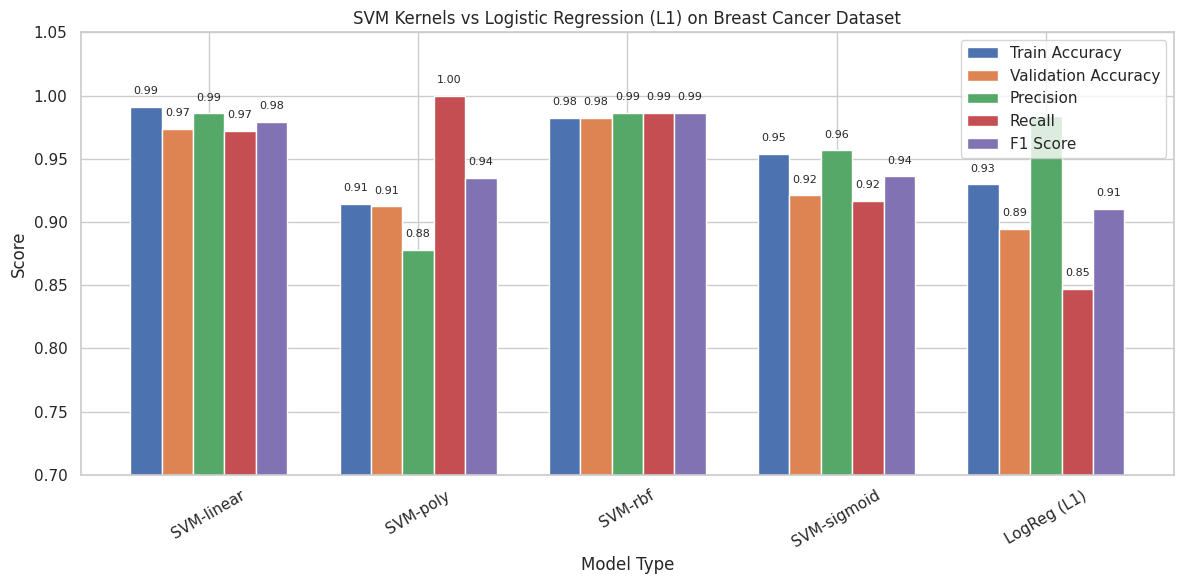

In [31]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#  Load the Breast Cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

# Data preprocessing (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#  Define SVM kernels to explore
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Store evaluation results
results = {
    'Model': [],
    'Train Accuracy': [],
    'Validation Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

#  Train and evaluate SVM for each kernel
for kernel in kernels:
    model = SVC(kernel=kernel, C=1, gamma='scale', random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test)
    rec = recall_score(y_test, y_pred_test)
    f1_val = f1_score(y_test, y_pred_test)

    # Store results
    results['Model'].append(f"SVM-{kernel}")
    results['Train Accuracy'].append(train_acc)
    results['Validation Accuracy'].append(val_acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1_val)

    # Console output
    print(f"\n Kernel: {kernel.upper()} ")
    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Validation Accuracy: {val_acc:.3f}")
    print(f"Precision (benign class): {prec:.3f}")
    print(f"Recall (benign class): {rec:.3f}")
    print(f"F1 Score: {f1_val:.3f}")

#  Train and evaluate Logistic Regression (L1 penalty)
model_logreg = LogisticRegression(
    random_state=100,
    max_iter=1500,
    penalty='l1',
    C=0.01,
    solver='liblinear'
)
model_logreg.fit(X_train, y_train)

# Predictions
y_train_pred_lr = model_logreg.predict(X_train)
y_test_pred_lr = model_logreg.predict(X_test)

# Metrics
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
val_acc_lr = accuracy_score(y_test, y_test_pred_lr)
prec_lr = precision_score(y_test, y_test_pred_lr)
rec_lr = recall_score(y_test, y_test_pred_lr)
f1_lr = f1_score(y_test, y_test_pred_lr)

# Store logistic regression results
results['Model'].append('LogReg (L1)')
results['Train Accuracy'].append(train_acc_lr)
results['Validation Accuracy'].append(val_acc_lr)
results['Precision'].append(prec_lr)
results['Recall'].append(rec_lr)
results['F1 Score'].append(f1_lr)

# Console output for Logistic Regression
print(f"\n LOGISTIC REGRESSION (L1)")
print(f"Training Accuracy: {train_acc_lr:.3f}")
print(f"Validation Accuracy: {val_acc_lr:.3f}")
print(f"Precision (benign class): {prec_lr:.3f}")
print(f"Recall (benign class): {rec_lr:.3f}")
print(f"F1 Score: {f1_lr:.3f}")

# Convert results to NumPy arrays for plotting
models = results['Model']
train_accs = results['Train Accuracy']
val_accs = results['Validation Accuracy']
precisions = results['Precision']
recalls = results['Recall']
f1s = results['F1 Score']

#  PLOT RESULTS: Grouped Bar Chart
x = np.arange(len(models))
width = 0.15

plt.figure(figsize=(12,6))
plt.bar(x - 2*width, train_accs, width, label='Train Accuracy')
plt.bar(x - width, val_accs, width, label='Validation Accuracy')
plt.bar(x, precisions, width, label='Precision')
plt.bar(x + width, recalls, width, label='Recall')
plt.bar(x + 2*width, f1s, width, label='F1 Score')

plt.xticks(x, models, rotation=30)
plt.xlabel('Model Type')
plt.ylabel('Score')
plt.title('SVM Kernels vs Logistic Regression (L1) on Breast Cancer Dataset')
plt.ylim(0.7, 1.05)
plt.legend()

# Annotate each bar with its value
for i, metric_list in enumerate([train_accs, val_accs, precisions, recalls, f1s]):
    xpos = x + (i - 2) * width
    for xi, yi in zip(xpos, metric_list):
        plt.text(xi, yi + 0.01, f"{yi:.2f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

**Problem 1** (C=0.001)


 Kernel: LINEAR
Training Accuracy: 0.938
Validation Accuracy: 0.956
Precision (benign class): 0.935
Recall (benign class): 1.000
F1 Score: 0.966

 Kernel: POLY
Training Accuracy: 0.642
Validation Accuracy: 0.658
Precision (benign class): 0.649
Recall (benign class): 1.000
F1 Score: 0.787

 Kernel: RBF
Training Accuracy: 0.626
Validation Accuracy: 0.632
Precision (benign class): 0.632
Recall (benign class): 1.000
F1 Score: 0.774

 Kernel: SIGMOID
Training Accuracy: 0.626
Validation Accuracy: 0.632
Precision (benign class): 0.632
Recall (benign class): 1.000
F1 Score: 0.774

 LOGISTIC REGRESSION (L1) 
Training Accuracy: 0.930
Validation Accuracy: 0.895
Precision (benign class): 0.984
Recall (benign class): 0.847
F1 Score: 0.910


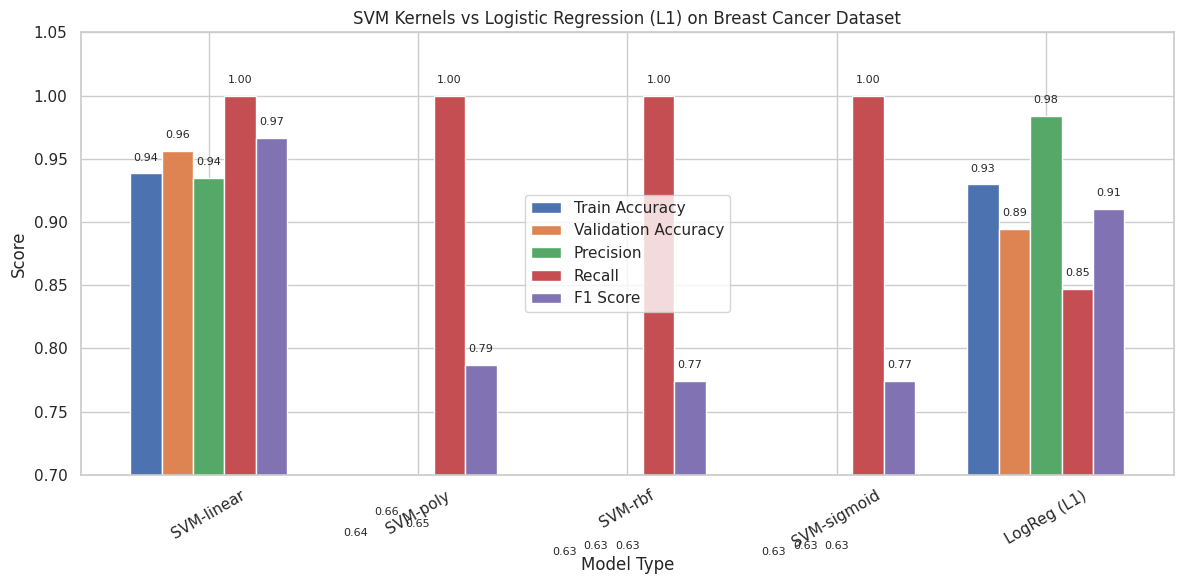

In [32]:
#  IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Breast Cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

# Data preprocessing (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Define SVM kernels to explore
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Store evaluation results
results = {
    'Model': [],
    'Train Accuracy': [],
    'Validation Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

#  Train and evaluate SVM for each kernel
for kernel in kernels:
    model = SVC(kernel=kernel, C=0.001, gamma='scale', random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test)
    rec = recall_score(y_test, y_pred_test)
    f1_val = f1_score(y_test, y_pred_test)

    # Store results
    results['Model'].append(f"SVM-{kernel}")
    results['Train Accuracy'].append(train_acc)
    results['Validation Accuracy'].append(val_acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1_val)

    # Console output
    print(f"\n Kernel: {kernel.upper()}")
    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Validation Accuracy: {val_acc:.3f}")
    print(f"Precision (benign class): {prec:.3f}")
    print(f"Recall (benign class): {rec:.3f}")
    print(f"F1 Score: {f1_val:.3f}")

#  Train and evaluate Logistic Regression (L1 penalty)
model_logreg = LogisticRegression(
    random_state=100,
    max_iter=1500,
    penalty='l1',
    C=0.01,
    solver='liblinear'
)
model_logreg.fit(X_train, y_train)

# Predictions
y_train_pred_lr = model_logreg.predict(X_train)
y_test_pred_lr = model_logreg.predict(X_test)

# Metrics
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
val_acc_lr = accuracy_score(y_test, y_test_pred_lr)
prec_lr = precision_score(y_test, y_test_pred_lr)
rec_lr = recall_score(y_test, y_test_pred_lr)
f1_lr = f1_score(y_test, y_test_pred_lr)

# Store logistic regression results
results['Model'].append('LogReg (L1)')
results['Train Accuracy'].append(train_acc_lr)
results['Validation Accuracy'].append(val_acc_lr)
results['Precision'].append(prec_lr)
results['Recall'].append(rec_lr)
results['F1 Score'].append(f1_lr)

# Console output for Logistic Regression
print(f"\n LOGISTIC REGRESSION (L1) ")
print(f"Training Accuracy: {train_acc_lr:.3f}")
print(f"Validation Accuracy: {val_acc_lr:.3f}")
print(f"Precision (benign class): {prec_lr:.3f}")
print(f"Recall (benign class): {rec_lr:.3f}")
print(f"F1 Score: {f1_lr:.3f}")

# Convert results to NumPy arrays for plotting
models = results['Model']
train_accs = results['Train Accuracy']
val_accs = results['Validation Accuracy']
precisions = results['Precision']
recalls = results['Recall']
f1s = results['F1 Score']

#  PLOT RESULTS: Grouped Bar Chart
x = np.arange(len(models))
width = 0.15

plt.figure(figsize=(12,6))
plt.bar(x - 2*width, train_accs, width, label='Train Accuracy')
plt.bar(x - width, val_accs, width, label='Validation Accuracy')
plt.bar(x, precisions, width, label='Precision')
plt.bar(x + width, recalls, width, label='Recall')
plt.bar(x + 2*width, f1s, width, label='F1 Score')

plt.xticks(x, models, rotation=30)
plt.xlabel('Model Type')
plt.ylabel('Score')
plt.title('SVM Kernels vs Logistic Regression (L1) on Breast Cancer Dataset')
plt.ylim(0.7, 1.05)
plt.legend()

# Annotate each bar with its value
for i, metric_list in enumerate([train_accs, val_accs, precisions, recalls, f1s]):
    xpos = x + (i - 2) * width
    for xi, yi in zip(xpos, metric_list):
        plt.text(xi, yi + 0.01, f"{yi:.2f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()